In [1]:
import pandas as pd
import numpy as np

### Step 1: Load the dataset
### Reading the Iris.csv file into a pandas DataFrame

In [14]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Step 2: Preprocess the data
### Dropping the 'Id' column as it's not a featur1)

In [16]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df = df.drop('Id', axis=1)

In [20]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking for missing values

In [22]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

### Step 5: Visualize outliers with box plots

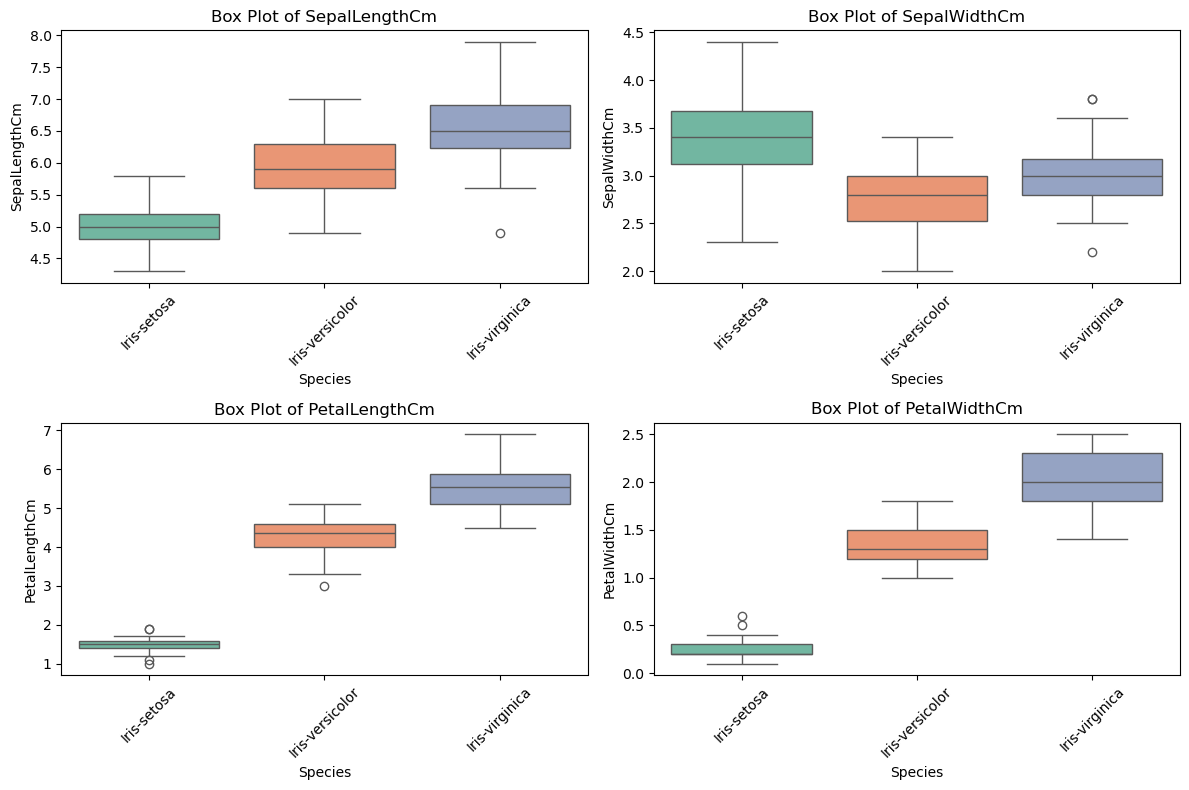

In [33]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
species_list = df['Species'].unique()
all_outliers = []
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=feature, data=df, hue='Species', palette='Set2')
    plt.title(f'Box Plot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('box_plots.png')
plt.show()
plt.close()

### Step 6: Visualize feature distributions with histograms

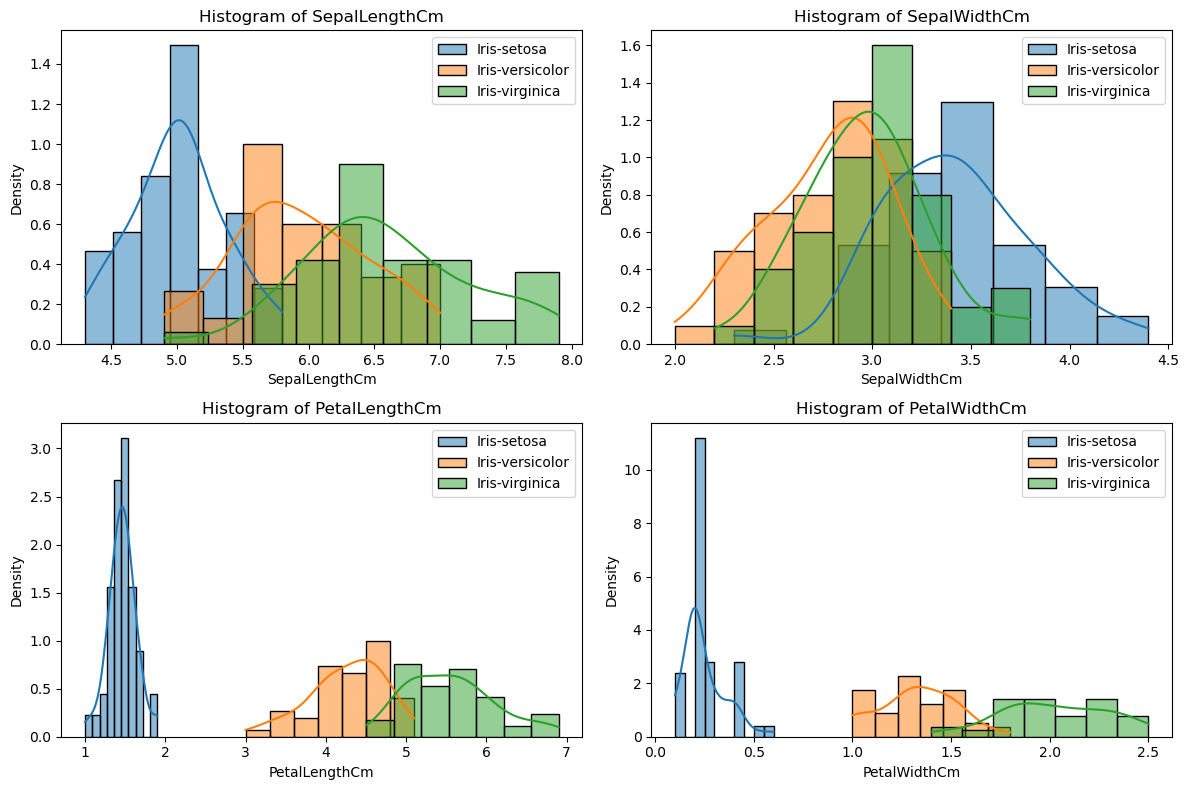

In [35]:

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    for species in species_list:
        sns.histplot(df[df['Species'] == species][feature], label=species, kde=True, stat='density')
    plt.title(f'Histogram of {feature}')
    plt.legend()
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()
plt.close()

### Step 7: Visualize feature relationships with pair plot

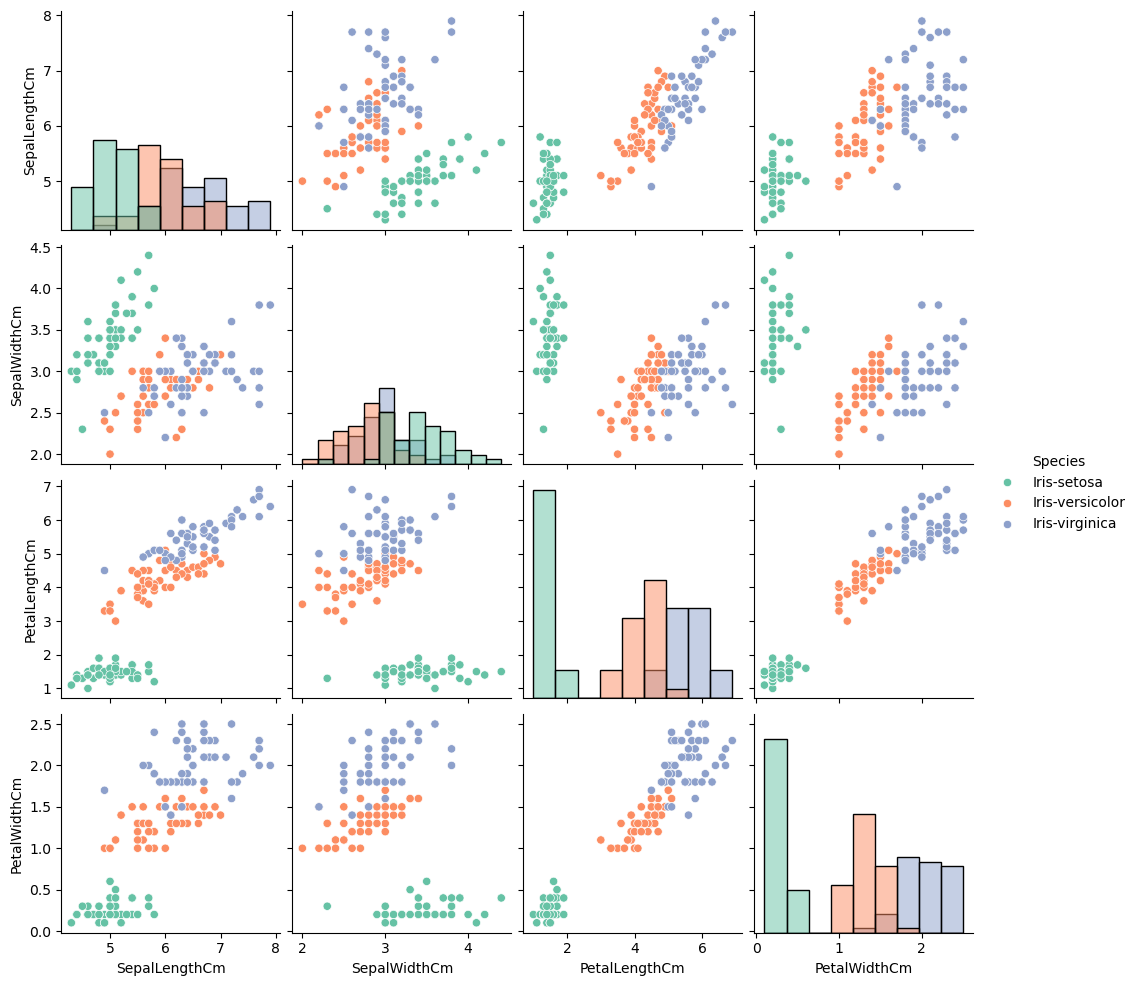

In [39]:
sns.pairplot(df, hue='Species', diag_kind='hist', palette='Set2')
plt.savefig('pair_plot.png')
plt.show()
plt.close()

### Encode the 'Species' column

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [48]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Split features and target']

In [52]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']


Accuracy: 1.00

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



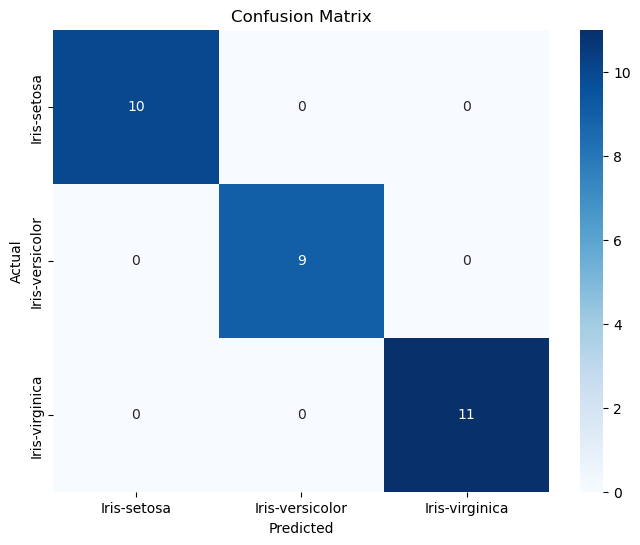

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale features (important for KNN)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Step 11: Make predictions
y_pred = model.predict(X_test)

# Step 12: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()
plt.close()

## Example prediction

In [92]:
new_sample = np.array([[2.0, 5.4, 4.5, 15.1]])
new_sample_scaled = scaler.transform(new_sample)
predicted_species = model.predict(new_sample_scaled)
print(f"\nPredicted species for new sample: {le.inverse_transform(predicted_species)[0]}")


Predicted species for new sample: Iris-virginica


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
